# 08-1. 합성곱 신경망의 구성요소
  *  합성곱 ( convolution )
  *  합성곱 신경망 (CNN)
  *  뉴런 -> 필터, 커널이라고 부른다.

## 합성곱
* 도장 형태로 찍으면 가중치 개수가 정해진다.
 * 1차원이 아닌 2차원으로도 존재 가능하다
    * 커널은 입력에 곱하는 가중치이고, 필터는 뉴런 개수를 표현할 때 사용한다.

입력 너비가 4이고(4x4) 커널 크기가 3x3일때 4번 찍을수 있으며, (2,2) 크기의 특성 맵을 추출할수 있다.

3개의 필터를 사용했으므로, (2,2,3) 의 크기로 3차원 배열이 된다.

* 도장 = 필터
* 도장 밑면 행렬 - 커널 (하이퍼파라미터)

## 케라스 합성곱 층
 * Conv2D 클라스

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation="relu")

* 첫 매개변수는 필터의 갯수이다. (도장의 갯수)
* 합성곱에서는 활성화 함수 / 출력을 언급하지 않는다. (안쓴다.)
* Conv2D를 Dense층에 썻던거와 같이 쓰면된다.
* 합성곱 층을 쓴 인공 신경망을 합성곱 신경망이라고 부른다.

### 패딩과 스트라이드
* 4x4 입력에 (작성되어 있는 행렬, 데이터 값)에 3x3의 크기의 커널 (도장 밑면)을 찍어보았는데 커널크기는 유지하되 4x4 의 출력으로 하려면?
  * 6x6에 4x4를 넣고 겉에 비어있는 칸을 가상의 원소로 채운다.
  * 그것을 **패딩(padding)**이라한다.
  * 0으로 채울경우 세임 패딩 - same padding
  * 확장하지 않고 합성곱을 할시 - valid padding이라 부르고 특성맵은 무조건 작게 나온다.


In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation="relu", padding="same")

* 이 커널(도장)이 옆으로 이동하는 보폭을 stride 스트라이드라고 한다.
  * 디폴트값은 1이다.

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation="relu",
                    padding="same", strides=1)

### 풀링 - pooling
* 합성곱에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다.
 * 하지만 특성맵의 개수를 줄이지는 않는다.
 * (2,2,3)크기의 특성맵을 풀링 적용 시 (1,1,3)으로 된다.

* 풀링은 가중치가 없다.
* 최대 풀링과 평균 풀링으로 나뉘며 찍은 영역에서 max나 평균값을 고른다.

In [ ]:
keras.layers.MaxPooling2D(2)

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding="valid")

평균은 AveragePooling2D 인데 최대 풀링을 더 많이 사용한다. 그 이유는 중요한 정보를 희석시킬수 있기 때문이다.

## 합성곱 신경망의 전체 구조


# 08-2. 합서곱 신경망을 사용한 이미지 분류

## 패션 Mnist 데이터 불러오기
* 7장과 매우 유사하게 하나, 입력 이미지를 밀집층으로 연결하기 위해 일렬로 펼쳐야함.
* 합성곱 신경망 2차원 이미지를 그대로 사용하여, 일렬로 펼칠 수 없다.
* reshape() 메서드를 사용해서 차원 유지후 마지막에 간단히 추가할 수 있다.


In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기
* 합성곱 신경망 구조
  * 합성곱 층으로 이미지에서 특징을 감지한후 밀집층으로 클라스에 따른 분류 확률르 계산
  * 케라스의 Sequential 클라스를 사용해서 구조를 정의
  * 첫번째 신경망 Conv2D 추가
    * Conv2D는 keras.layer 패키지에 안에 있음

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu",
                              padding="same", input_shape=(28,28,1)))


In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu",
                              padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

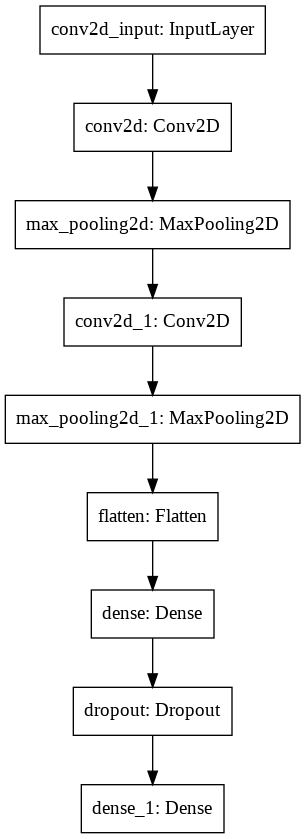

In [7]:
keras.utils.plot_model(model)

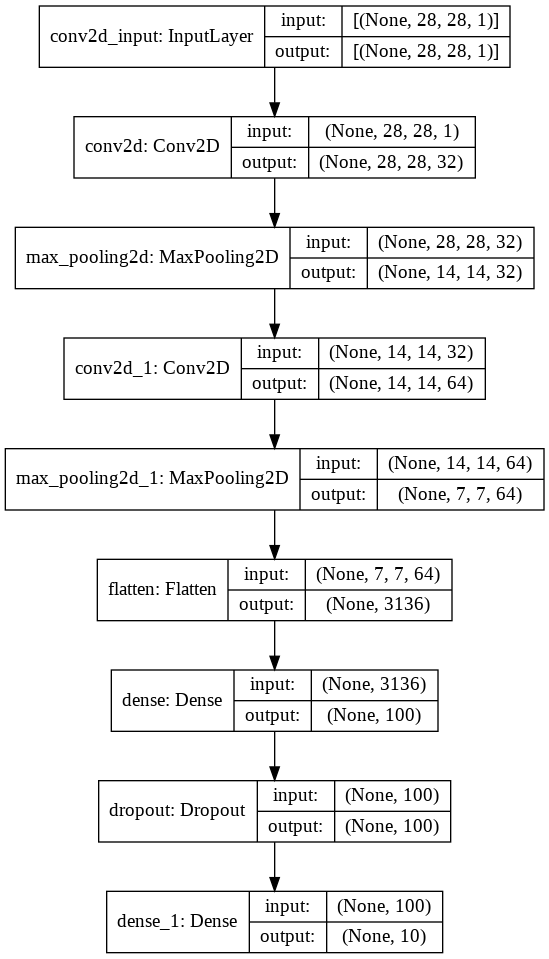

In [8]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련
* 케라스 API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 같다는 점이다.
* 완전 연결 신경망 모델과 훈련, 컴파일하는 코드는 유사하다.
* Adam 옵티마이저 -> ModelCheckpoint 콜백 과 EarlyStopping 콜백을 사용해 조기종료 기법 구현

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 42s 7ms/step - loss: 0.5190 - accuracy: 0.8139 - val_loss: 0.3387 - val_accuracy: 0.8746
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3474 - accuracy: 0.8741 - val_loss: 0.2840 - val_accuracy: 0.8952
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3004 - accuracy: 0.8908 - val_loss: 0.2586 - val_accuracy: 0.9042
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2703 - accuracy: 0.9020 - val_loss: 0.2563 - val_accuracy: 0.9045
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2473 - accuracy: 0.9091 - val_loss: 0.2423 - val_accuracy: 0.9096
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2287 - accuracy: 0.9160 - val_loss: 0.2290 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2091 - accuracy: 0.9222 - val_loss: 0.2227 - val_accuracy

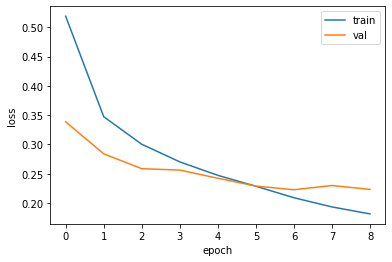

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2227 - accuracy: 0.9172


[0.22269505262374878, 0.9171666502952576]

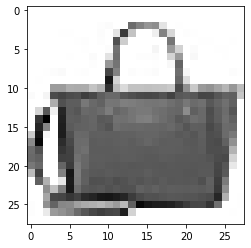

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.5753096e-15 1.6054734e-16 1.8355735e-15 7.3955700e-15 9.5481988e-13
  3.4939603e-11 1.5553321e-14 5.4061430e-12 1.0000000e+00 4.9375091e-11]]


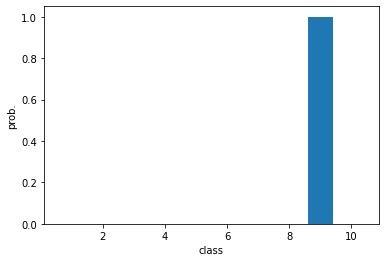

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [17]:
classes = ["티셔츠", "바지", "스웨터", " 드레스", "코트", " 샌달", "셔츠", "스니커즈", "가방", "앵글 부츠"]

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2421 - accuracy: 0.9127


[0.24213697016239166, 0.9126999974250793]

# 08-3. 합성곱 신경망의 시각화


 ## 가중치 시각화

In [21]:
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")

In [22]:
model.layers

In [25]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [26]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02029112 0.23948792


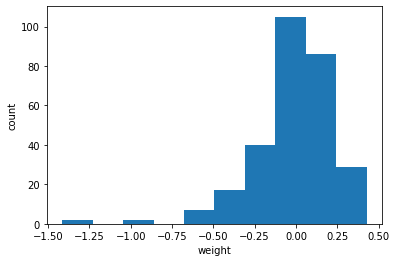

In [27]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

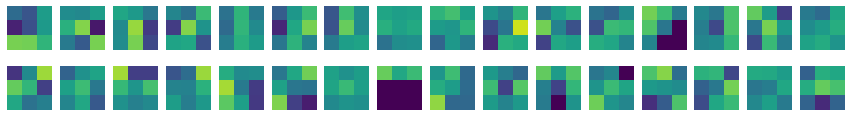

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

In [29]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [30]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [31]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0018619974 0.084608585


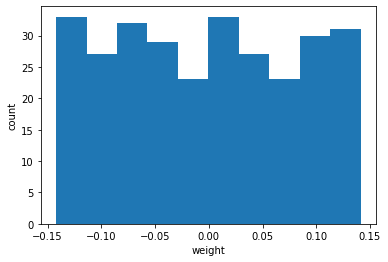

In [32]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

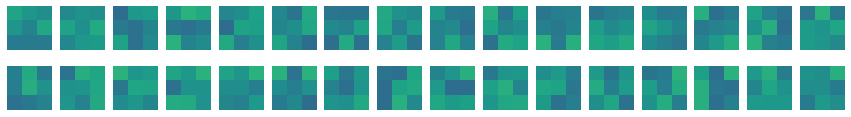

In [34]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

## 함수형 API
* 케라스의 Model 클라스를 이용하여 모델을 만든다.

In [35]:
dense1 = keras.layers.Dense(100, activation="sigmoid")
dense2 = keras.layers.Dense(10, activation="softmax")

In [37]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [39]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

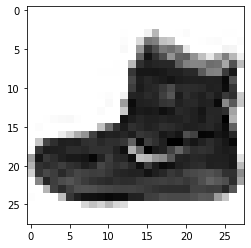

In [40]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap="gray_r")
plt.show()

In [41]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [42]:
print(feature_maps.shape)

(1, 28, 28, 32)


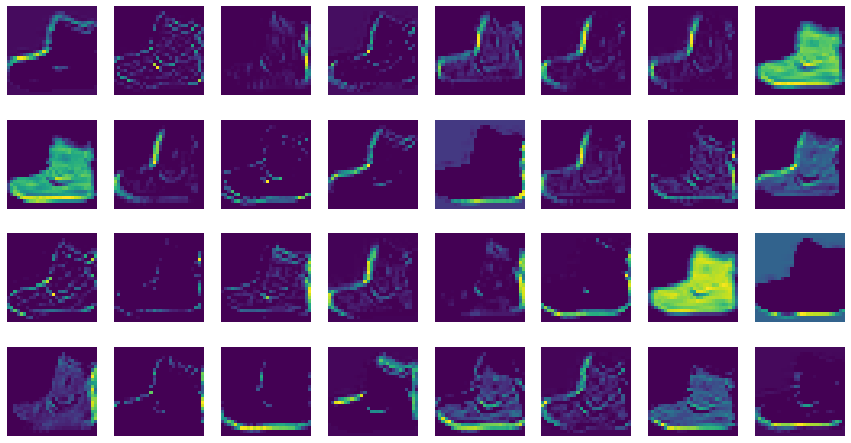

In [43]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 +j])
    axs[i, j].axis("off")
plt.show()

In [44]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [46]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

(1, 14, 14, 64)


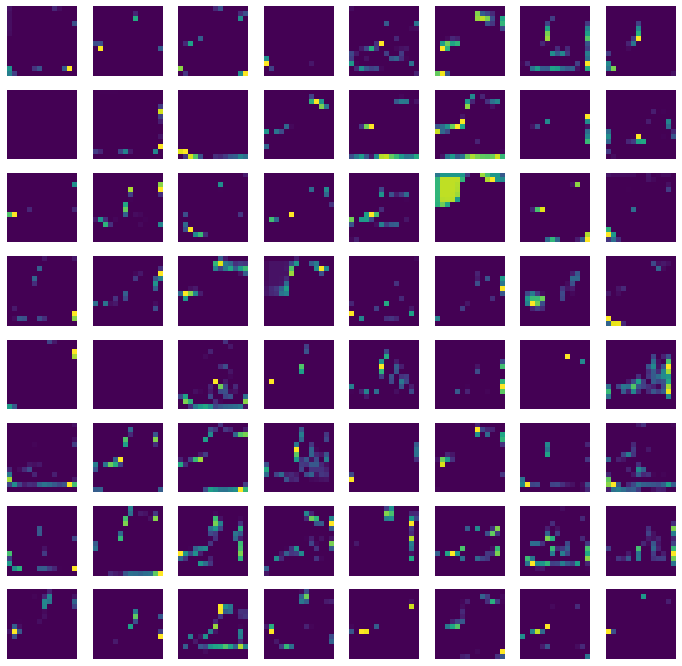

In [47]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 +j])
    axs[i, j].axis("off")
plt.show()